In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [3]:
os.listdir("../Titanic")

['.ipynb_checkpoints',
 'test.csv',
 'Titanic_ex.ipynb',
 'submission.csv',
 'SKplanet_titanic.ipynb',
 'kaggle_titanic.ipynb',
 'train.csv']

In [3]:
df_train = pd.read_csv('../Titanic/train.csv')
df_test  = pd.read_csv('../Titanic/test.csv')

In [4]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 타이타닉 데이터 Feature 설명 ###
- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- bembarked - 탑승 항구

In [19]:
# pclass 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [26]:
# crosstab으로 편하게
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [29]:
# mean은 생종률을 구하게 할 수 있습니다. 
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

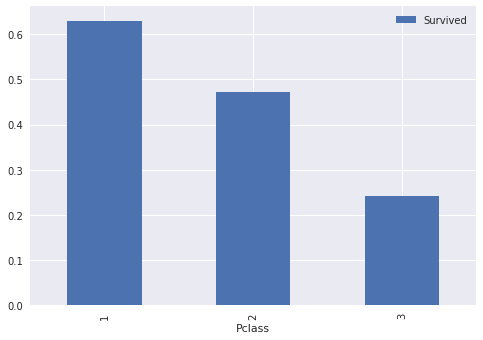

In [11]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().plot.bar()

**Age**

In [6]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 나이 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


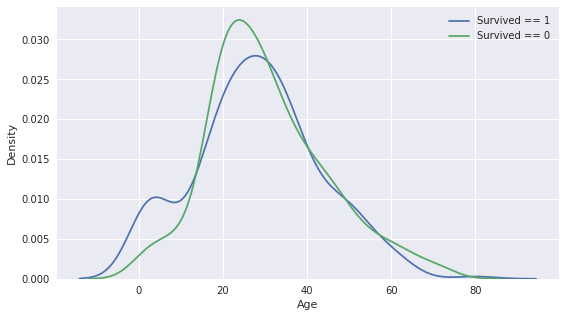

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()